## GRIP TASK 2: Prediction using Unsupervised ML
 
 Problem Statement: Predicting optimum number of cluster from the given data using K-Means and to visualise the clusters formed

## Author: Shashwath Saravanan

In [1]:
# Importing required libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
#Reading the provide data

iris = "C:\Python\Scripts\Datasets\iris.csv"
df = pd.read_csv(iris)
print("The dimension of the given data: ",df.shape, "\n\nSample of the data are as follows:")
df.head()

The dimension of the given data:  (150, 6) 

Sample of the data are as follows:


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


We working with 150 rows of data with 6 columns as shown above, we notice that the column "Id" is redundant.

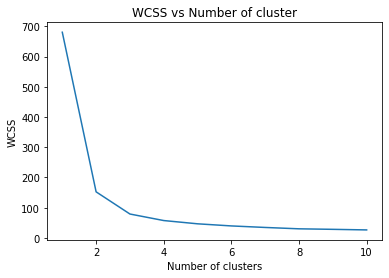

In [3]:
#Finding the optimum clusters

df1 = pd.DataFrame(df.iloc[:, [1, 2, 3,4]])
wcss = [] #Within sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df1)
    wcss.append(kmeans.inertia_)
    
# Plotting graph between WCSS vs Number of cluster
plt.plot(range(1, 11), wcss)
plt.title('WCSS vs Number of cluster')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

Occurance of Elbow happens at i = 3, so we will create 3 cluster

In [4]:
#Fitting kmeans Algorithm with 3 cluster

predict = KMeans(n_clusters = 3).fit_predict(df1,df["Species"])

In [5]:
# Reduction of 4 Dimensions to 2 using PCA

pca = PCA(n_components=2)
pca = pd.DataFrame(pca.fit_transform(df1))
df1=pd.concat([df1, pca], axis=1, join="inner")
df1=np.array(df1)

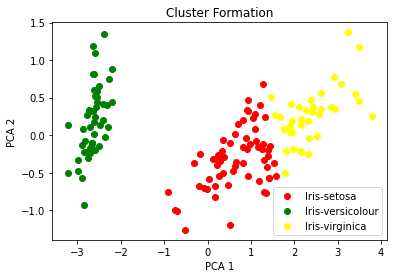

<Figure size 1440x1440 with 0 Axes>

In [6]:
# Visualising the clusters formed using PCA

plt.scatter(df1[predict == 0, 4], df1[predict == 0, 5], c = 'red', label = 'Iris-setosa')
plt.scatter(df1[predict == 1, 4], df1[predict == 1, 5], c = 'green', label = 'Iris-versicolour')
plt.scatter(df1[predict == 2, 4], df1[predict == 2, 5], c = 'yellow', label = 'Iris-virginica')

plt.legend()
plt.title("Cluster Formation")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.figure(figsize = (20,20))
plt.show()

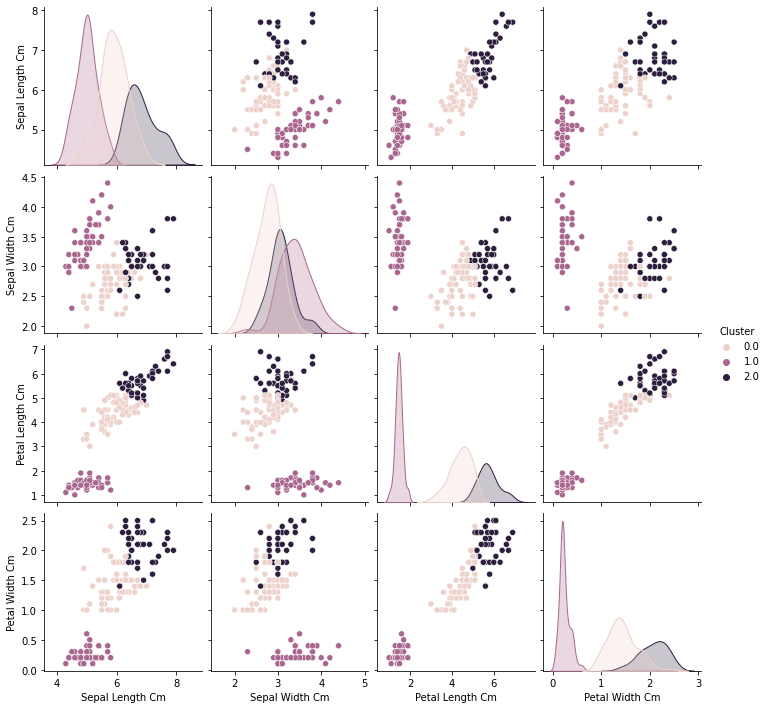

In [7]:
#Another way to Visualise

df2 = pd.DataFrame(np.concatenate((df1[:,0:4],predict.reshape(150,1)),axis=1))
df2.columns = ["Sepal Length Cm", "Sepal Width Cm", "Petal Length Cm", "Petal Width Cm", "Cluster"]
sns.pairplot(df2, hue = "Cluster")